In [48]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.mixture import BayesianGaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from math import sin, cos, atan2, sqrt
import pandas as pd
from pathlib import Path
from pyproj import Proj, transform
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, TimeSeriesSplit
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [49]:
df = pd.read_csv('data-kiem-tra-2.csv', encoding='latin-1', sep=',')
df.head(5)

,date,truong_1,truong_2,truong_3,truong_4,truong_5
0,10.05.2013,4,58,3773,299.0,1
1,26.05.2013,4,58,3768,249.0,1
2,19.05.2013,4,58,4036,419.0,1
3,25.05.2013,4,58,12878,149.0,1
4,15.05.2013,4,58,12885,148.0,1


#### Sử dụng biểu đồ heatmap đề kiểm tra độ tương quan của dữ liệu

<Axes: >

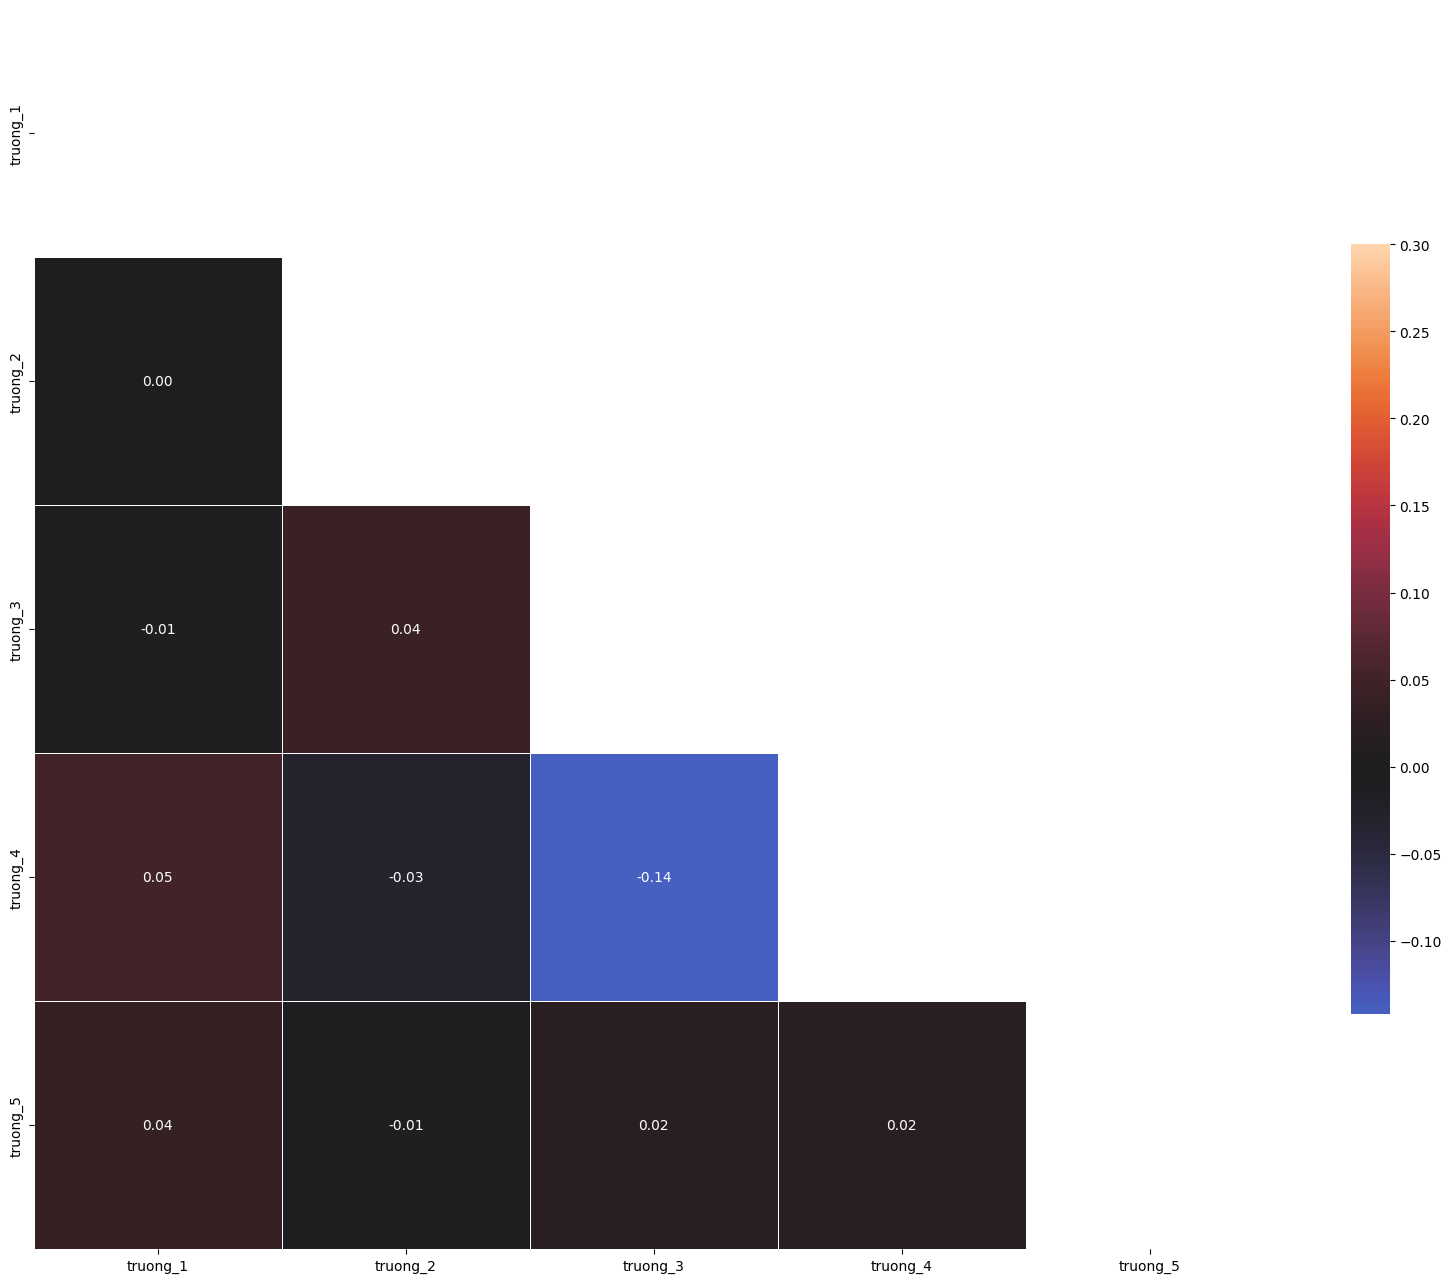

In [50]:
df_toheat= df.drop(labels='date', axis=1)
mask = np.triu(np.ones_like(df_toheat.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_toheat.corr(), mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True,fmt='.2f')

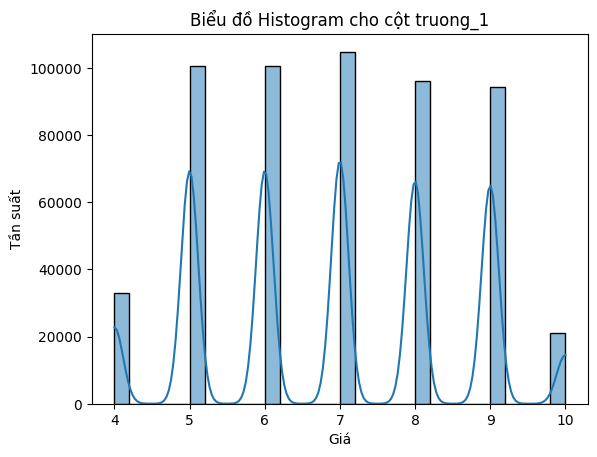

In [51]:
# Tạo biểu đồ histogram bằng seaborn
sns.histplot(df['truong_1'], bins=30, kde=True)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ Histogram cho cột truong_1')
plt.xlabel('Giá')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

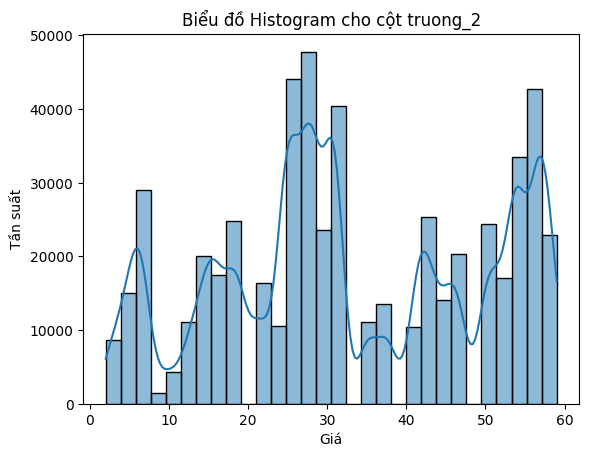

In [52]:
# Tạo biểu đồ histogram bằng seaborn
sns.histplot(df['truong_2'], bins=30, kde=True)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ Histogram cho cột truong_2')
plt.xlabel('Giá')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

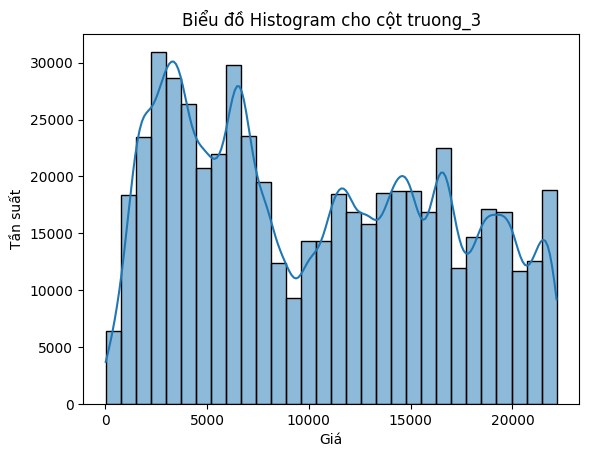

In [53]:
# Tạo biểu đồ histogram bằng seaborn
sns.histplot(df['truong_3'], bins=30, kde=True)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ Histogram cho cột truong_3')
plt.xlabel('Giá')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

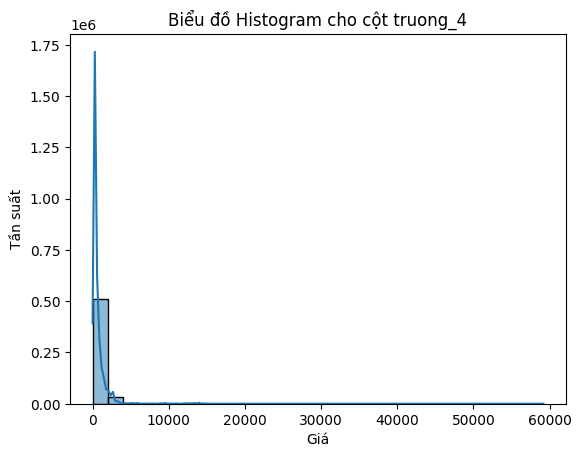

In [54]:
# Tạo biểu đồ histogram bằng seaborn
sns.histplot(df['truong_4'], bins=30, kde=True)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ Histogram cho cột truong_4')
plt.xlabel('Giá')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

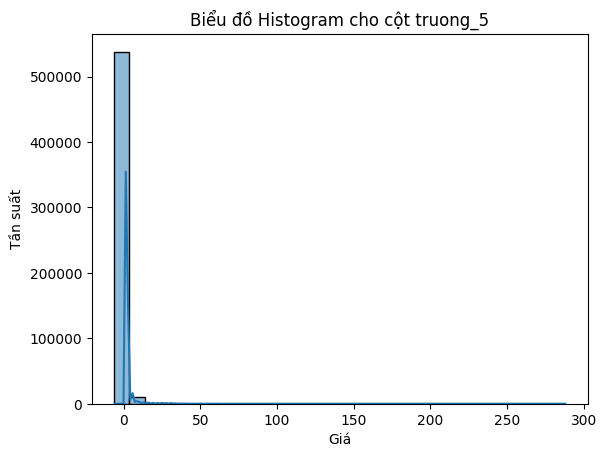

In [55]:
# Tạo biểu đồ histogram bằng seaborn
sns.histplot(df['truong_5'], bins=30, kde=True)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ Histogram cho cột truong_5')
plt.xlabel('Giá')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

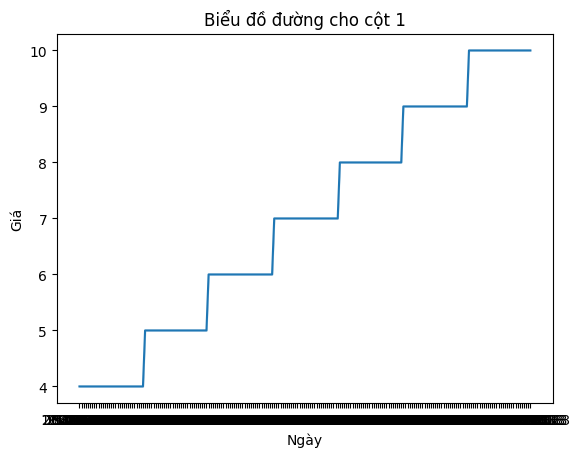

In [56]:
# Tạo biểu đồ đường bằng seaborn
sns.lineplot(x=df['date'], y=df['truong_1'], data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ đường cho cột 1')
plt.xlabel('Ngày')
plt.ylabel('Giá')

# Hiển thị biểu đồ
plt.show()

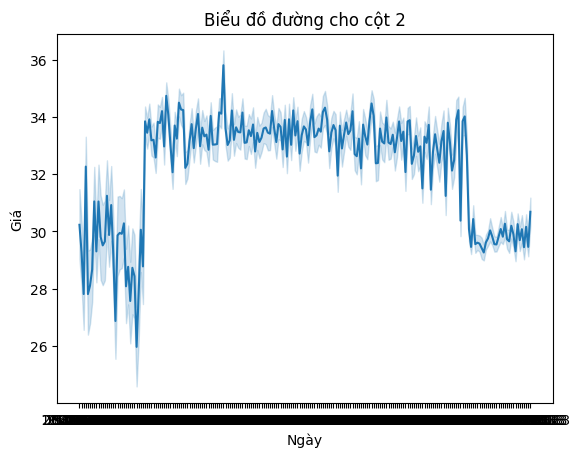

In [57]:
# Tạo biểu đồ đường bằng seaborn
sns.lineplot(x=df['date'], y=df['truong_2'], data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ đường cho cột 2')
plt.xlabel('Ngày')
plt.ylabel('Giá')

# Hiển thị biểu đồ
plt.show()

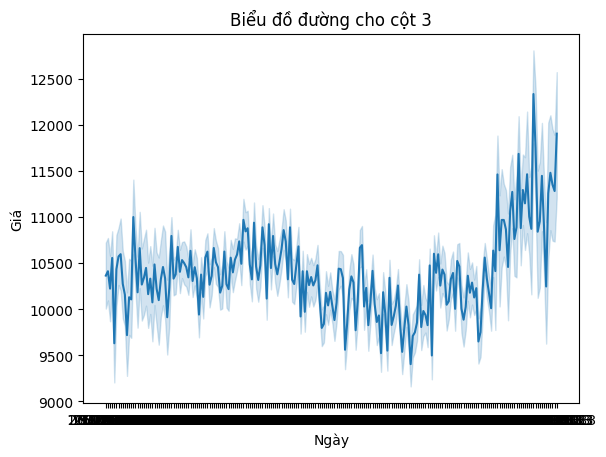

In [58]:
# Tạo biểu đồ đường bằng seaborn
sns.lineplot(x=df['date'], y=df['truong_3'], data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ đường cho cột 3')
plt.xlabel('Ngày')
plt.ylabel('Giá')

# Hiển thị biểu đồ
plt.show()

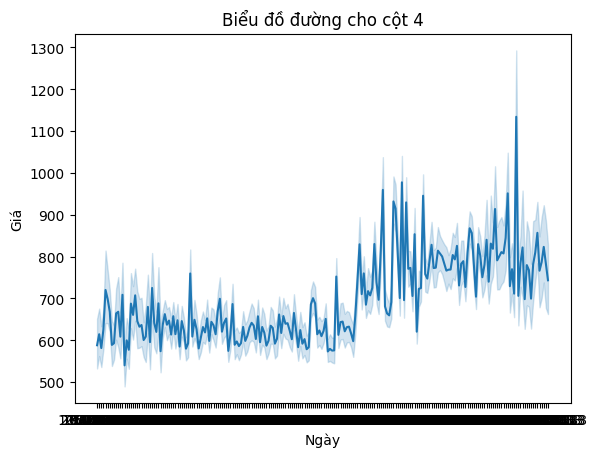

In [59]:
# Tạo biểu đồ đường bằng seaborn
sns.lineplot(x=df['date'], y=df['truong_4'], data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ đường cho cột 4')
plt.xlabel('Ngày')
plt.ylabel('Giá')

# Hiển thị biểu đồ
plt.show()

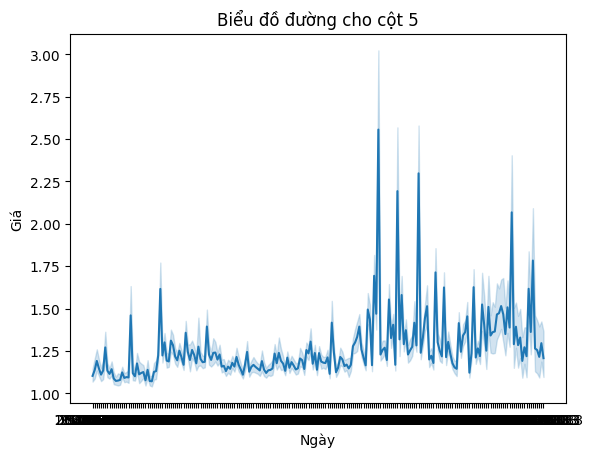

In [60]:
# Tạo biểu đồ đường bằng seaborn
sns.lineplot(x=df['date'], y=df['truong_5'], data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ đường cho cột 5')
plt.xlabel('Ngày')
plt.ylabel('Giá')

# Hiển thị biểu đồ
plt.show()

### Tiền xử lí dữ liệu

In [61]:
df = df.drop_duplicates(subset=['date'])

In [62]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df.set_index('date', inplace=True)

In [63]:
df = df.sort_values(by='date')
df.index = np.arange(1, len(df)+1)

### Áp dụng mô hình Arima

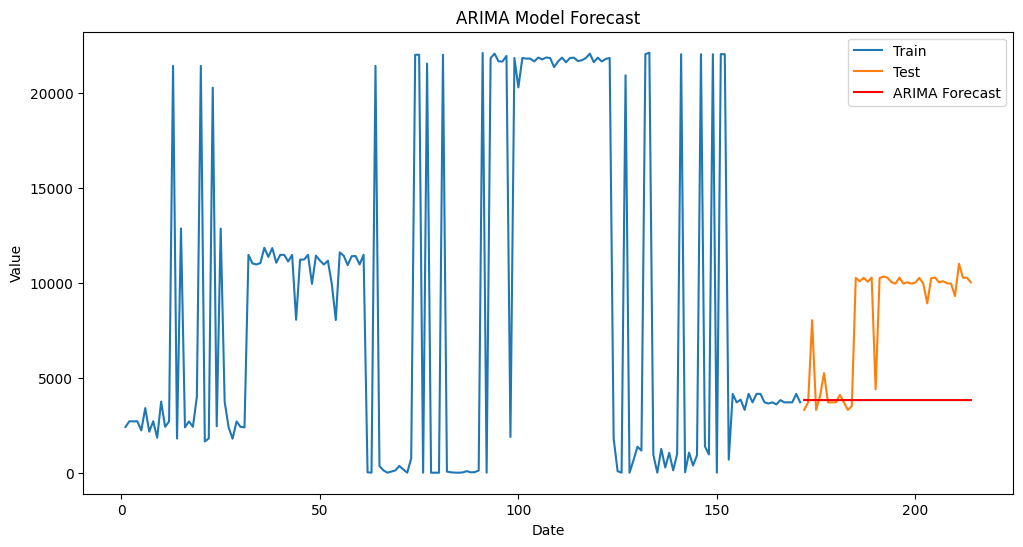

171    3858.756780
172    3852.679413
173    3852.975464
174    3852.961043
175    3852.961745
176    3852.961711
177    3852.961713
178    3852.961713
179    3852.961713
180    3852.961713
181    3852.961713
182    3852.961713
183    3852.961713
184    3852.961713
185    3852.961713
186    3852.961713
187    3852.961713
188    3852.961713
189    3852.961713
190    3852.961713
191    3852.961713
192    3852.961713
193    3852.961713
194    3852.961713
195    3852.961713
196    3852.961713
197    3852.961713
198    3852.961713
199    3852.961713
200    3852.961713
201    3852.961713
202    3852.961713
203    3852.961713
204    3852.961713
205    3852.961713
206    3852.961713
207    3852.961713
208    3852.961713
209    3852.961713
210    3852.961713
211    3852.961713
212    3852.961713
213    3852.961713
Name: predicted_mean, dtype: float64


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Chọn cột 'truong_3' để phân tích chuỗi thời gian
time_series = df['truong_3']
# Chia dữ liệu thành tập huấn luyện (train) và tập kiểm tra (test)
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]
p = 1
d = 1
q = 1

# Khớp mô hình ARIMA
arima_model = ARIMA(train, order=(p, d, q))
arima_fit = arima_model.fit()

# Dự báo cho tập kiểm tra
forecast_steps = len(test)
arima_forecast = arima_fit.forecast(steps=forecast_steps)

# Vẽ biểu đồ chuỗi thời gian gốc, tập huấn luyện, tập kiểm tra và dự báo ARIMA
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# In kết quả dự báo
print(arima_forecast)

In [65]:
arima_pred = arima_fit.predict(start = len(train), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

171    3858.756780
172    3852.679413
173    3852.975464
174    3852.961043
175    3852.961745
176    3852.961711
177    3852.961713
178    3852.961713
179    3852.961713
180    3852.961713
181    3852.961713
182    3852.961713
183    3852.961713
184    3852.961713
185    3852.961713
186    3852.961713
187    3852.961713
188    3852.961713
189    3852.961713
190    3852.961713
191    3852.961713
192    3852.961713
193    3852.961713
194    3852.961713
195    3852.961713
196    3852.961713
197    3852.961713
198    3852.961713
199    3852.961713
200    3852.961713
201    3852.961713
202    3852.961713
203    3852.961713
204    3852.961713
205    3852.961713
206    3852.961713
207    3852.961713
208    3852.961713
209    3852.961713
210    3852.961713
211    3852.961713
212    3852.961713
213    3852.961713
Name: ARIMA Predictions, dtype: float64

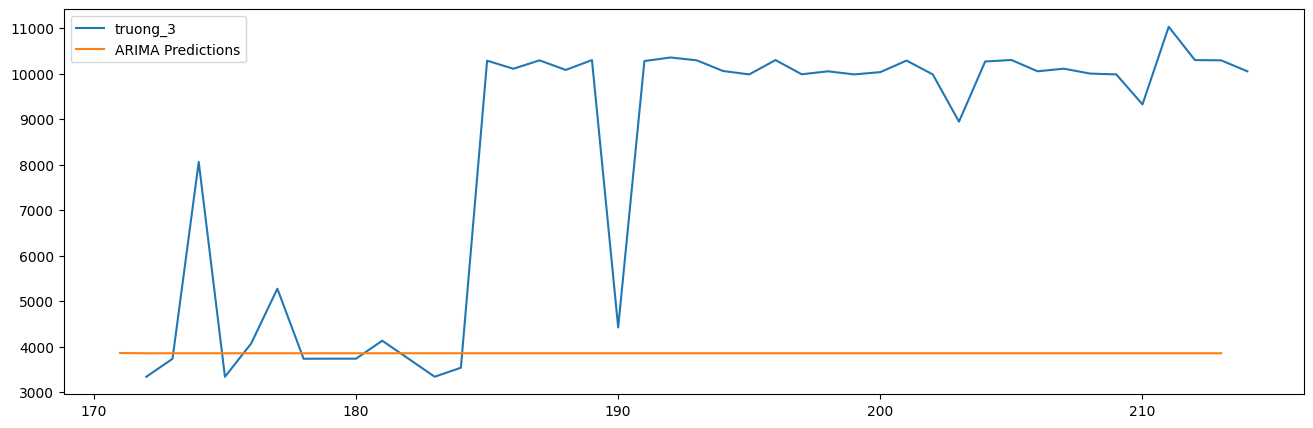

In [66]:
test.plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
# Tính các độ đo đánh giá
mae = mean_absolute_error(test, arima_forecast)
mse = mean_squared_error(test, arima_forecast)
rmse = np.sqrt(mse)

# In các độ đo đánh giá
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 4435.289662808528
Mean Squared Error (MSE): 27004655.47843688
Root Mean Squared Error (RMSE): 5196.600377019276


### Áp dụng mô hình Garch

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5648.688352962145
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1766.4617320758725
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1764.4444545790248
Iteration:      4,   Func. Count:     24,   Neg. LLF: 1764.4262765690805
Iteration:      5,   Func. Count:     29,   Neg. LLF: 1764.4261285750508
Iteration:      6,   Func. Count:     34,   Neg. LLF: 1764.4259897600368
Iteration:      7,   Func. Count:     39,   Neg. LLF: 1764.4259776270367
Iteration:      8,   Func. Count:     44,   Neg. LLF: 1764.4259117388535
Iteration:      9,   Func. Count:     49,   Neg. LLF: 1764.4255817920143
Iteration:     10,   Func. Count:     54,   Neg. LLF: 1764.4239169541966
Iteration:     11,   Func. Count:     59,   Neg. LLF: 1764.4156775244355
Iteration:     12,   Func. Count:     64,   Neg. LLF: 1764.3747010474276
Iteration:     13,   Func. Count:     69,   Neg. LLF: 1764.1757289965526
Iteration:     14,   Func. Count:     74,   Neg. LLF

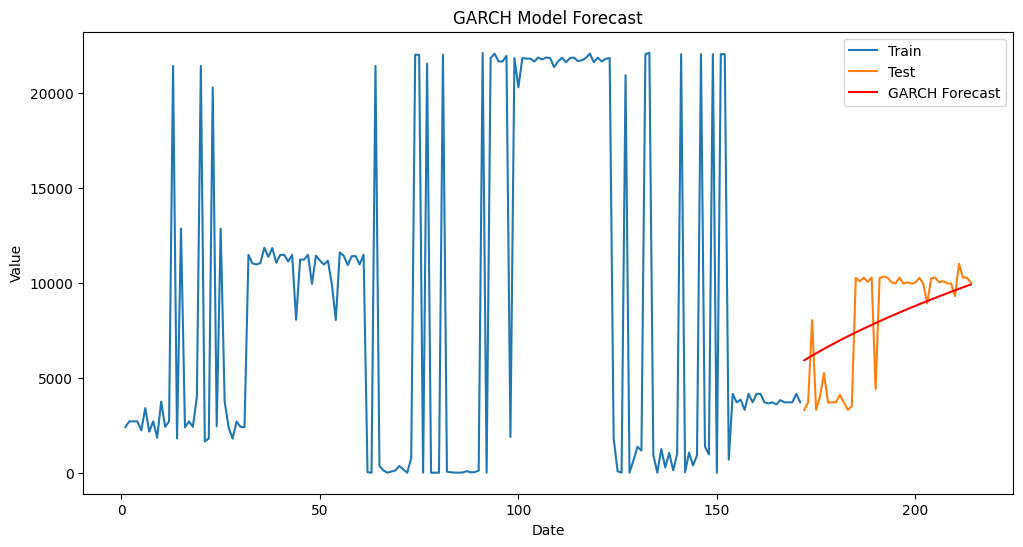

[5944.2924489  6070.10491024 6193.36213414 6314.21376166 6432.79537459
 6549.23027803 6663.63100254 6776.10057786 6886.7336194  6995.61725997
 7102.83195291 7208.45216774 7312.54699527 7415.18067624 7516.41306506
 7616.30003794 7714.89385353 7812.24347256 7908.39484206 8003.39114884
 8097.27304619 8190.07885725 8281.84475774 8372.60494079 8462.3917658
 8551.23589321 8639.16640681 8726.21092502 8812.39570215 8897.74572094
 8982.28477716 9066.03555703 9149.01970839 9231.25790604 9312.76991186
 9393.57463028 9473.69015948 9553.13383876 9631.92229228 9710.07146976
 9787.59668413 9864.51264658 9940.83349915]


In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Chọn cột 'truong_3' để phân tích chuỗi thời gian
time_series = df['truong_3']

# Chia dữ liệu thành tập huấn luyện (train) và tập kiểm tra (test)
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]

# Khởi tạo và fit mô hình GARCH
model = arch_model(train, vol='GARCH', p=1, q=1)
garch_fit = model.fit()

# Dự báo cho tập kiểm tra
garch_forecast = garch_fit.forecast(horizon=len(test))

# Lấy ra phần dự báo của chuỗi
garch_forecast_values = np.sqrt(garch_forecast.variance.values[-1, :])

# Tính các độ đo đánh giá
mae = mean_absolute_error(test, garch_forecast_values)
mse = mean_squared_error(test, garch_forecast_values)
rmse = np.sqrt(mse)

# In các độ đo đánh giá
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Vẽ biểu đồ chuỗi thời gian gốc, tập huấn luyện, tập kiểm tra và dự báo ARIMA
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, garch_forecast_values, label='GARCH Forecast', color='red')
plt.title('GARCH Model Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# In kết quả dự báo
print(garch_forecast_values)